# Question 2.1
## Exploratory Analysis
* Box-Cox plots to examine nonlinearity in factors
* Kendall's correlation should handle Econometric data better than Pearson's( for potential multicolinearity) 
* Confirm stationarity for all factors through Dickey-Fuller hypothesis test
* The factor crowding did not pass Dickey-Fuller stationarity and had to be transformed
* Next we see if any factors have extremely low variance using sklearn variance threshold
* Since this data is very small only 196, we will use .99 percent of the data for training and the last percent for potential testing if time permits

## Gauss Markov assumptions :
* Linear in parameters
* Random Sampling
* No perfect Colinearity
* Zero Conditional mean of residuals
* Homoskedascity

## Evaluation of model : 
* We cross validate the model to prevent overfitting which is common in finance
* Using model summary we obtain hypothesis tests for parameters, residuals, the F test associated with the ANOVA table, and summary stats(AIC)

In [35]:
import pandas as pd
import seaborn as sns
import numpy as np
df=pd.read_csv('returnsant.csv')

In [2]:
df.isnull().sum()

perf_date                           0
Hedge Fund                          0
Factor - Low Risk                   0
Factor - Value vs Growth            0
Factor - Fixed Income Carry         0
Factor - Local Equity               0
Factor - Trend Following            0
Factor - Commodities                0
Factor - Equity                     0
Factor - Foreign Exchange Carry     0
Factor - Small Cap                  0
Factor - Emerging Markets           0
Factor - Foreign Currency           0
Factor - Local Inflation            0
Factor - Equity Short Volatility    0
Factor - Credit                     0
Factor - Interest Rates             0
Factor - Crowding                   0
Factor - Momentum                   0
Factor - Quality                    0
dtype: int64

In [96]:
#No missing data now we will proceed with exploratory data analysis
df.describe()
#value vs growth 
#crowding 
# interest rates


,Hedge Fund,Factor - Low Risk,Factor - Value vs Growth,Factor - Fixed Income Carry,Factor - Local Equity,Factor - Trend Following,Factor - Commodities,Factor - Equity,Factor - Foreign Exchange Carry,Factor - Small Cap,Factor - Emerging Markets,Factor - Foreign Currency,Factor - Local Inflation,Factor - Equity Short Volatility,Factor - Credit,Factor - Interest Rates,Factor - Crowding,Factor - Momentum,Factor - Quality
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.008426,0.005162,150.222145,0.000084,-0.000999,0.005613,-0.001761,0.006200,-0.000083,-0.002021,-0.002571,0.001120,0.002171,0.001245,0.000228,165.289979,0.002219,0.005333,0.006526
std,0.029623,0.028541,2569.592857,0.019464,0.021516,0.026661,0.020470,0.040760,0.020065,0.018025,0.020904,0.018551,0.022432,0.018643,0.027555,1725.936406,0.009019,0.032067,0.015723
min,-0.096051,-0.128207,-12739.631010,-0.075152,-0.081331,-0.072346,-0.060501,-0.149934,-0.063892,-0.090379,-0.125790,-0.038892,-0.085123,-0.052001,-0.170308,-0.028068,-0.052240,-0.127459,-0.040496
25%,-0.009950,-0.011406,-0.015540,-0.010146,-0.014698,-0.010551,-0.013445,-0.014444,-0.010376,-0.011469,-0.013991,-0.010622,-0.008966,-0.009227,-0.009373,-0.003997,-0.000932,-0.011822,-0.001276
50%,0.008800,0.004758,-0.000972,0.001565,-0.000484,0.003492,-0.001189,0.012433,0.001187,-0.001049,-0.000205,0.000475,0.000509,0.004018,0.003766,0.002805,0.001267,0.007850,0.007147
75%,0.028000,0.023451,0.011636,0.011342,0.012546,0.020816,0.011129,0.028201,0.013087,0.009227,0.010226,0.011589,0.012679,0.012631,0.017425,0.009257,0.007310,0.024615,0.014936
max,0.087900,0.076999,31963.201490,0.065239,0.056810,0.102276,0.058252,0.115115,0.071994,0.069783,0.037207,0.067272,0.081401,0.040368,0.057066,23213.711040,0.028112,0.124979,0.084840


In [304]:
df["Factor - Crowding"].head(30)

0     0.000000
1     0.000000
2     0.000000
3     0.000000
4     0.000000
5     0.000000
6     0.000000
7     0.000000
8     0.000000
9     0.000000
10    0.000000
11    0.000000
12    0.000000
13    0.000000
14    0.000000
15    0.000000
16    0.000000
17    0.000000
18    0.000000
19    0.000000
20    0.000000
21    0.000000
22    0.000000
23    0.000000
24   -0.001966
25    0.000292
26    0.000026
27   -0.000554
28    0.009135
29    0.004828
Name: Factor - Crowding, dtype: float64

In [332]:
df2["Factor - Crowding"].iloc[0:24]=np.mean(df2["Factor - Crowding"].iloc[24:-1])

In [334]:
df2.describe()

,Factor - Low Risk,Factor - Value vs Growth,Factor - Fixed Income Carry,Factor - Local Equity,Factor - Trend Following,Factor - Commodities,Factor - Equity,Factor - Foreign Exchange Carry,Factor - Small Cap,Factor - Emerging Markets,Factor - Foreign Currency,Factor - Local Inflation,Factor - Equity Short Volatility,Factor - Credit,Factor - Interest Rates,Factor - Crowding,Factor - Momentum,Factor - Quality
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.005162,150.222145,0.000084,-0.000999,0.005613,-0.001761,0.006200,-0.000083,-0.002021,-0.002571,0.001120,0.002171,0.001245,0.000228,165.289979,0.002536,0.005333,0.006526
std,0.028541,2569.592857,0.019464,0.021516,0.026661,0.020470,0.040760,0.020065,0.018025,0.020904,0.018551,0.022432,0.018643,0.027555,1725.936406,0.008980,0.032067,0.015723
min,-0.128207,-12739.631010,-0.075152,-0.081331,-0.072346,-0.060501,-0.149934,-0.063892,-0.090379,-0.125790,-0.038892,-0.085123,-0.052001,-0.170308,-0.028068,-0.052240,-0.127459,-0.040496
25%,-0.011406,-0.015540,-0.010146,-0.014698,-0.010551,-0.013445,-0.014444,-0.010376,-0.011469,-0.013991,-0.010622,-0.008966,-0.009227,-0.009373,-0.003997,-0.000932,-0.011822,-0.001276
50%,0.004758,-0.000972,0.001565,-0.000484,0.003492,-0.001189,0.012433,0.001187,-0.001049,-0.000205,0.000475,0.000509,0.004018,0.003766,0.002805,0.002571,0.007850,0.007147
75%,0.023451,0.011636,0.011342,0.012546,0.020816,0.011129,0.028201,0.013087,0.009227,0.010226,0.011589,0.012679,0.012631,0.017425,0.009257,0.007310,0.024615,0.014936
max,0.076999,31963.201490,0.065239,0.056810,0.102276,0.058252,0.115115,0.071994,0.069783,0.037207,0.067272,0.081401,0.040368,0.057066,23213.711040,0.028112,0.124979,0.084840


In [335]:
df2["Factor - Value vs Growth"]=valuegrow
df2["Factor - Interest Rates"]=interestrates

In [249]:
Value=pd.DataFrame(Value)
Value.describe()

,0
count,192.000000
mean,-0.000228
std,0.027049
min,-0.126148
25%,-0.015506
50%,-0.000994
75%,0.011222
max,0.126823


In [307]:
def find_anomalies(data):
    #define a list to accumlate anomalies
    anomalies = []
    
    # Set upper and lower limit to 3 standard deviation
    data_std = np.std(data)
    data_mean = np.mean(data)
    cut_off = data_std * 3
    
    lower_limit  = data_mean - cut_off 
    upper_limit = data_mean + cut_off
    # Generate outliers
    indexs=[]
    i=0
    for outlier in data:
        
        if outlier > upper_limit or outlier < lower_limit:
            data[i]=np.mean(data)
        i+=1
    return data

valuegrow=np.array(df2["Factor - Value vs Growth"])
#print(find_anomalies(Value))


,0
count,195.000000
mean,2.729721
std,22.175182
min,-0.126148
25%,-0.015122
50%,-0.000827
75%,0.011917
max,216.323956


In [312]:
interestrates=np.array(df2["Factor - Interest Rates"])

In [322]:
interestrates=find_anomalies(np.array(interestrates))

In [323]:
interestrates=pd.DataFrame(interestrates)
interestrates.describe()

,0
count,195.000000
mean,0.002920
std,0.012336
min,-0.028068
25%,-0.003997
50%,0.002805
75%,0.008943
max,0.098557


In [324]:
valuegrow=find_anomalies(np.array(valuegrow))

In [325]:
valuegrow=pd.DataFrame(valuegrow)
valuegrow.describe()

,0
count,195.000000
mean,0.000018
std,0.026940
min,-0.126148
25%,-0.015122
50%,-0.000827
75%,0.011636
max,0.126823


In [262]:
stuff2=np.array(df2["Factor - Interest Rates"])
len(stuff2)

195

In [295]:
#interest=np.delete(np.array(interest),24)
Rate=pd.DataFrame(interest)
Rate.describe()

,0
count,192.000000
mean,0.002373
std,0.010298
min,-0.028068
25%,-0.004176
50%,0.002626
75%,0.008854
max,0.035963


In [245]:
#stuff=np.array(df2["Factor - Value vs Growth"])
Value=np.delete(Value,179)

In [336]:
df2.describe()

,Factor - Low Risk,Factor - Value vs Growth,Factor - Fixed Income Carry,Factor - Local Equity,Factor - Trend Following,Factor - Commodities,Factor - Equity,Factor - Foreign Exchange Carry,Factor - Small Cap,Factor - Emerging Markets,Factor - Foreign Currency,Factor - Local Inflation,Factor - Equity Short Volatility,Factor - Credit,Factor - Interest Rates,Factor - Crowding,Factor - Momentum,Factor - Quality
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.005162,0.000018,0.000084,-0.000999,0.005613,-0.001761,0.006200,-0.000083,-0.002021,-0.002571,0.001120,0.002171,0.001245,0.000228,0.002920,0.002536,0.005333,0.006526
std,0.028541,0.026940,0.019464,0.021516,0.026661,0.020470,0.040760,0.020065,0.018025,0.020904,0.018551,0.022432,0.018643,0.027555,0.012336,0.008980,0.032067,0.015723
min,-0.128207,-0.126148,-0.075152,-0.081331,-0.072346,-0.060501,-0.149934,-0.063892,-0.090379,-0.125790,-0.038892,-0.085123,-0.052001,-0.170308,-0.028068,-0.052240,-0.127459,-0.040496
25%,-0.011406,-0.015122,-0.010146,-0.014698,-0.010551,-0.013445,-0.014444,-0.010376,-0.011469,-0.013991,-0.010622,-0.008966,-0.009227,-0.009373,-0.003997,-0.000932,-0.011822,-0.001276
50%,0.004758,-0.000827,0.001565,-0.000484,0.003492,-0.001189,0.012433,0.001187,-0.001049,-0.000205,0.000475,0.000509,0.004018,0.003766,0.002805,0.002571,0.007850,0.007147
75%,0.023451,0.011636,0.011342,0.012546,0.020816,0.011129,0.028201,0.013087,0.009227,0.010226,0.011589,0.012679,0.012631,0.017425,0.008943,0.007310,0.024615,0.014936
max,0.076999,0.126823,0.065239,0.056810,0.102276,0.058252,0.115115,0.071994,0.069783,0.037207,0.067272,0.081401,0.040368,0.057066,0.098557,0.028112,0.124979,0.084840


/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


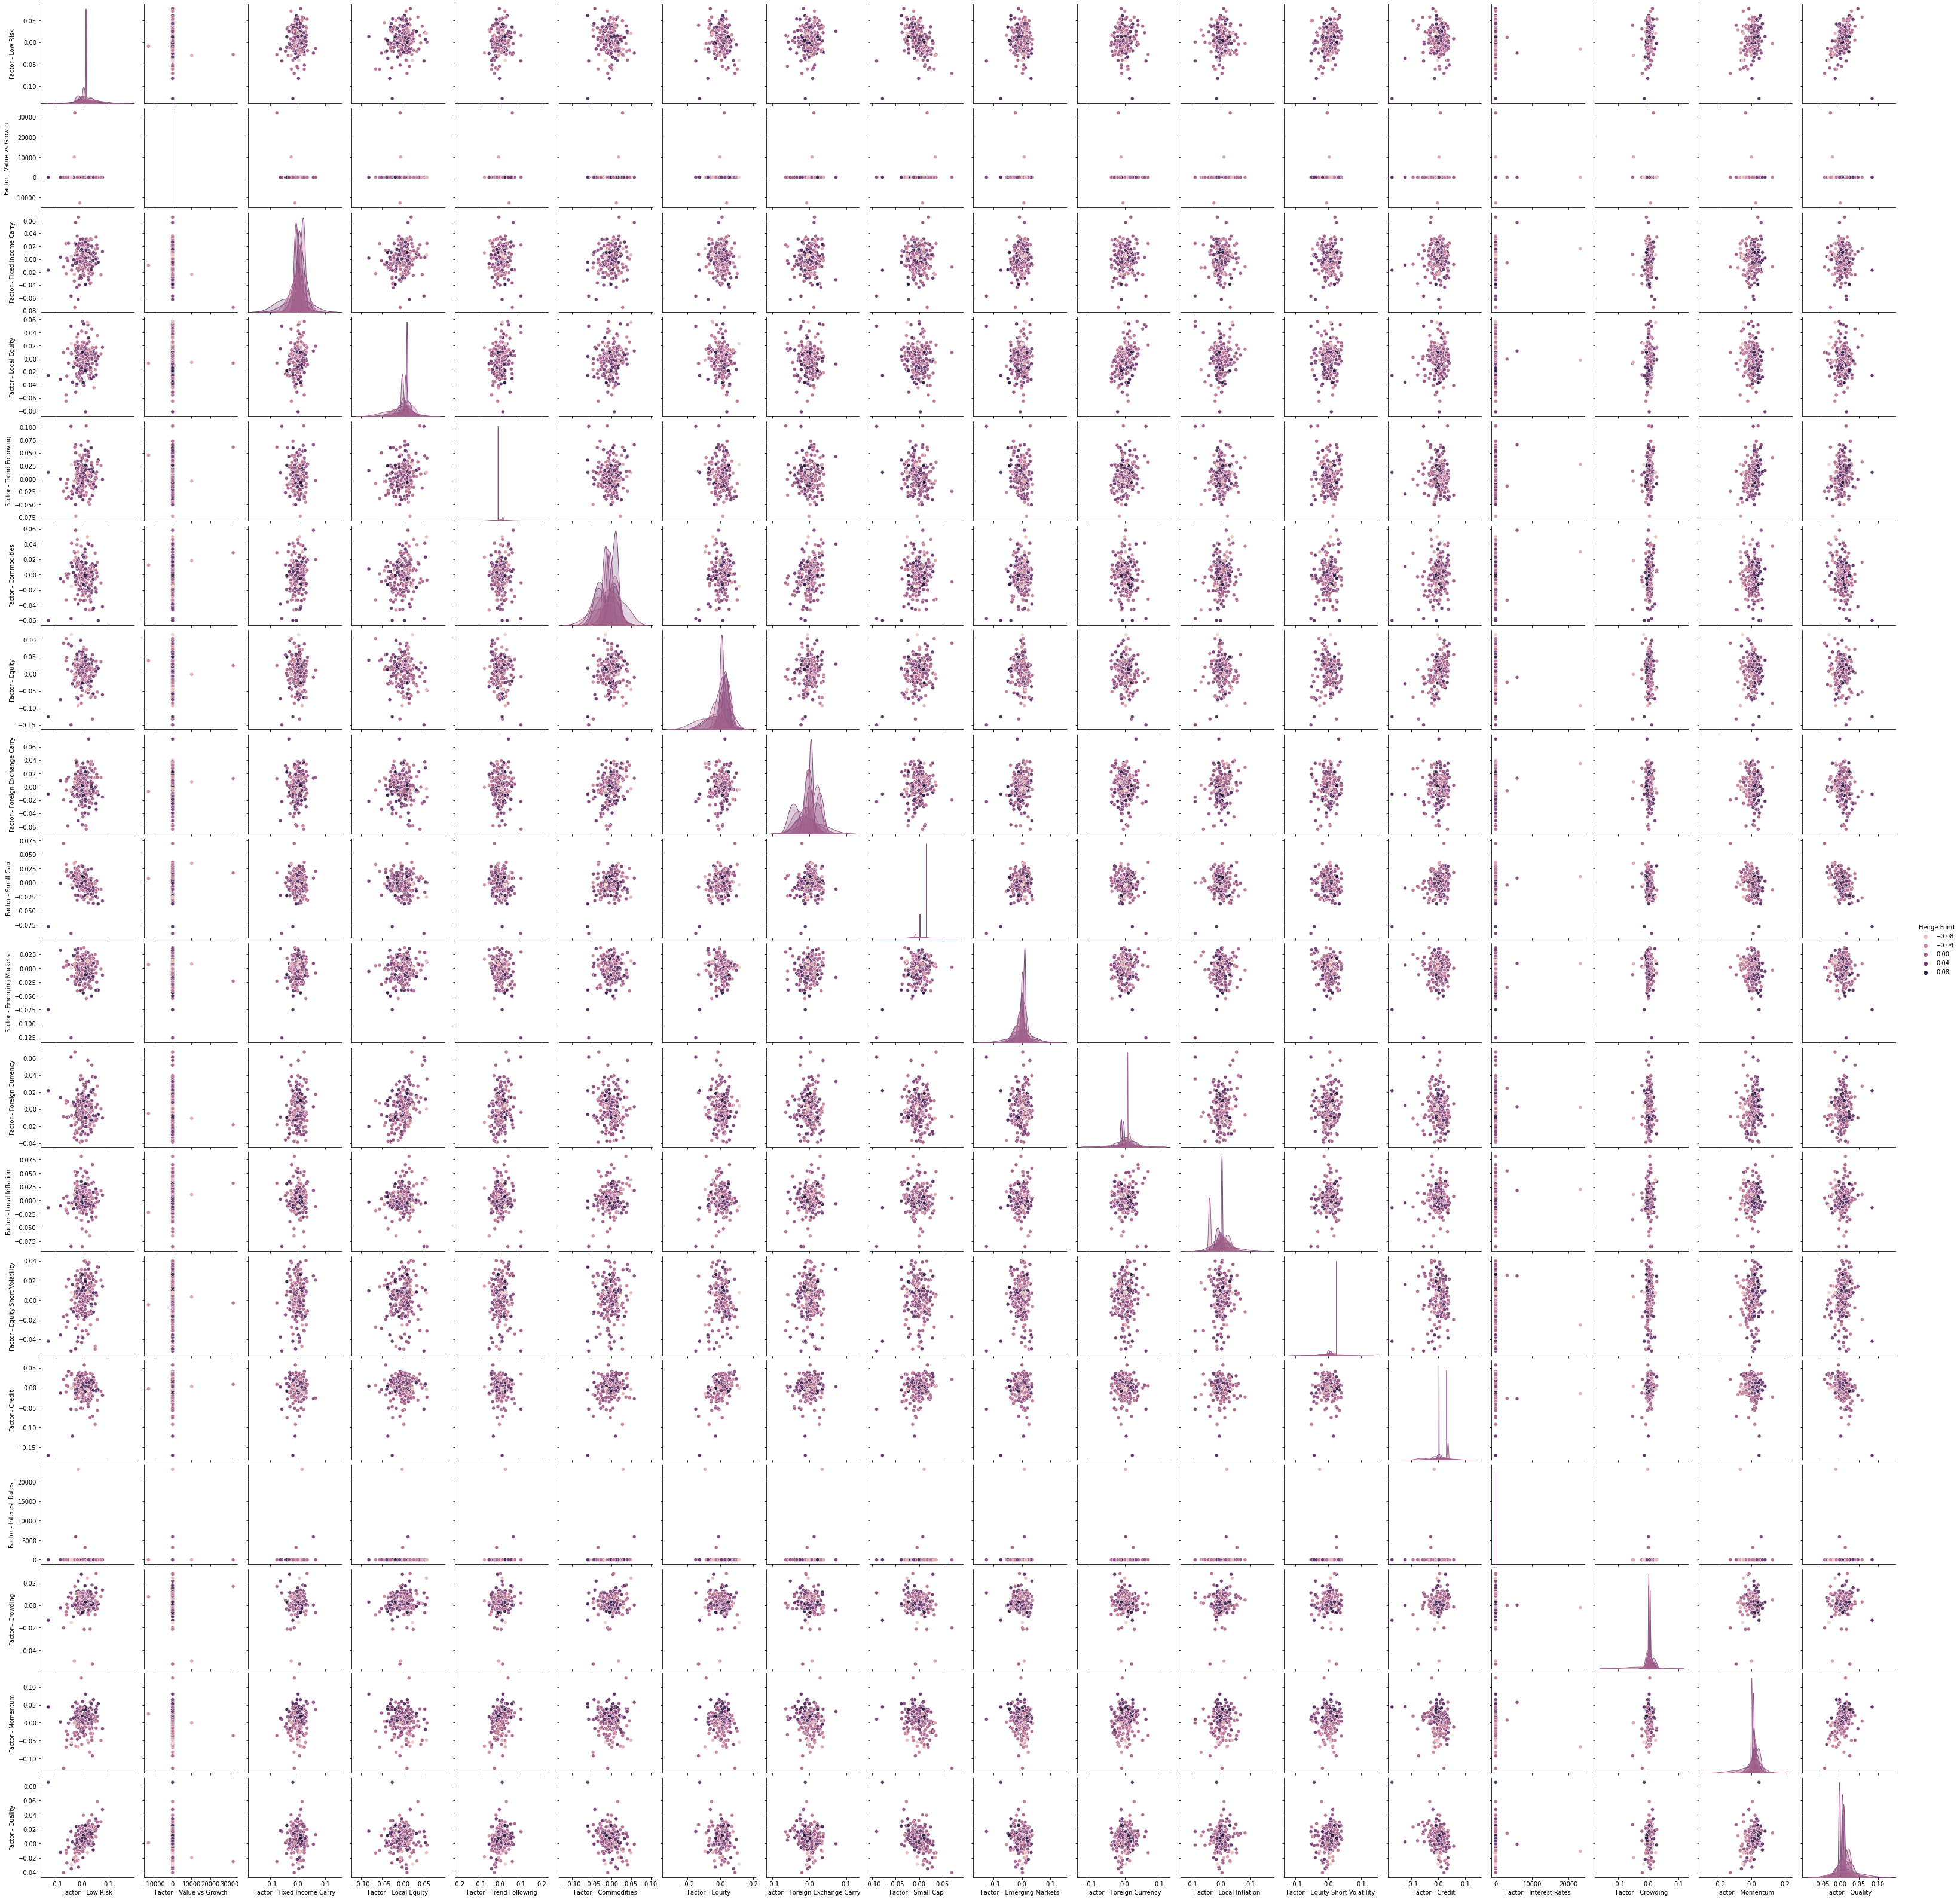

In [4]:
sns.pairplot(df,"Hedge Fund")


In [218]:
from scipy.stats import boxcox
from sklearn.preprocessing import MinMaxScaler
positivedf=df2+1
positivedf=positivedf[positivedf > 0 ]
print((positivedf.columns))

Index(['Factor - Low Risk', 'Factor - Value vs Growth',
       'Factor - Fixed Income Carry', 'Factor - Local Equity',
       'Factor - Trend Following', 'Factor - Commodities', 'Factor - Equity',
       'Factor - Foreign Exchange Carry', 'Factor - Small Cap',
       'Factor - Emerging Markets', 'Factor - Foreign Currency',
       'Factor - Local Inflation', 'Factor - Equity Short Volatility',
       'Factor - Credit', 'Factor - Interest Rates', 'Factor - Crowding',
       'Factor - Momentum', 'Factor - Quality'],
      dtype='object')


In [216]:
for feature in positivedf.columns:
    transformed, best_lambda = boxcox(positivedf[feature])
    print(" for the feature {} the best_lambda is {}".format(feature,best_lambda))

 for the feature Factor - Low Risk the best_lambda is 6.129758050804135
 for the feature Factor - Value vs Growth the best_lambda is 8.472135811722177
 for the feature Factor - Fixed Income Carry the best_lambda is 5.256338494756719
 for the feature Factor - Local Equity the best_lambda is 3.361395755012388
 for the feature Factor - Trend Following the best_lambda is -3.919436421455107
 for the feature Factor - Commodities the best_lambda is 3.0057318890684575
 for the feature Factor - Equity the best_lambda is 5.113891535644884
 for the feature Factor - Foreign Exchange Carry the best_lambda is 4.8580122681101745
 for the feature Factor - Small Cap the best_lambda is 5.717557256681356
 for the feature Factor - Emerging Markets the best_lambda is 14.488511968243659
 for the feature Factor - Foreign Currency the best_lambda is -6.708716323279809
 for the feature Factor - Local Inflation the best_lambda is 2.4789666588714865
 for the feature Factor - Equity Short Volatility the best_lamb

<AxesSubplot:>

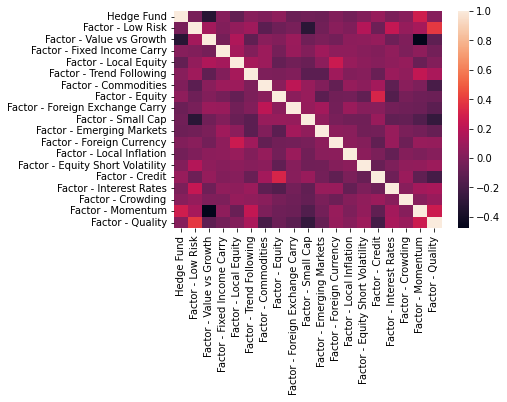

In [225]:
sns.heatmap(df.corr(method='kendall'))
## There may exist multicolineaity amongst these factors due to heatmap
## Factor - Momentum
#"Factor - Credit
#"Factor - Quality
#sns.heatmap(df.corr)
# reexamine the multicolinear after outlier detection

<AxesSubplot:>

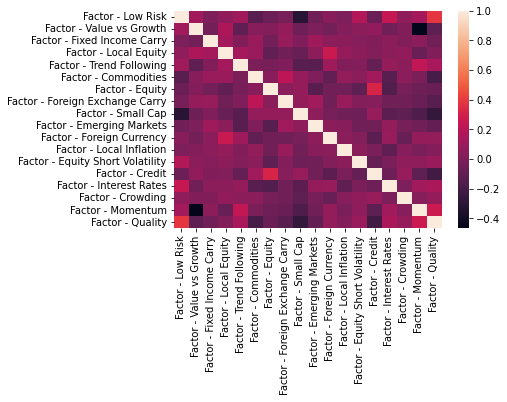

In [337]:
sns.heatmap(df2.corr(method='kendall'))

In [205]:
from statsmodels.tsa.stattools import adfuller
def stationarity(df):
    pvalue=[]
    i=0
    for feature in (df.columns):
        pvalue.append(adfuller(df[feature].values)[1])
        if  pvalue[i] <= 0.05:
            print("Stationary feature {} with p-value {}".format(feature,pvalue[i]))
            i+=1
        else:
            print("Non-Stationary feature {} with p-value {}".format(feature,pvalue[i]))
            i+=1

In [134]:
# Factor Crowding failed the stationarity Dickey-Fuller hypothesis test
# I first order difference and replace missing value with mean
crowding=np.diff(df2["Factor - Crowding"])
crowding=list(crowding)
crowding.append(np.mean(crowding))
df2["Factor - Crowding"]= crowding

stationarity(df2)
targettest=adfuller(df["Hedge Fund"].values)[1] 
if targettest <= 0.05:
    print("Stationary with p-value {}".format(targettest))
else:
    print("not stationary")


Stationary feature Factor - Low Risk with p-value 8.049517181736375e-21
Stationary feature Factor - Value vs Growth with p-value 5.002668716851679e-12
Stationary feature Factor - Fixed Income Carry with p-value 2.462921769096802e-25
Stationary feature Factor - Local Equity with p-value 6.9291295004938825e-09
Stationary feature Factor - Trend Following with p-value 1.6592042137754708e-05
Stationary feature Factor - Commodities with p-value 2.963812192618041e-11
Stationary feature Factor - Equity with p-value 1.0260426689125895e-22
Stationary feature Factor - Foreign Exchange Carry with p-value 1.5171726683931426e-17
Stationary feature Factor - Small Cap with p-value 6.53273576126725e-25
Stationary feature Factor - Emerging Markets with p-value 1.5780692653553101e-28
Stationary feature Factor - Foreign Currency with p-value 7.969419703887611e-13
Stationary feature Factor - Local Inflation with p-value 2.914482747382117e-25
Stationary feature Factor - Equity Short Volatility with p-value 

In [338]:
stationarity(df2)

Stationary feature Factor - Low Risk with p-value 8.049517181736375e-21
Stationary feature Factor - Value vs Growth with p-value 2.2442316528253293e-12
Stationary feature Factor - Fixed Income Carry with p-value 2.462921769096802e-25
Stationary feature Factor - Local Equity with p-value 6.9291295004938825e-09
Stationary feature Factor - Trend Following with p-value 1.6592042137754708e-05
Stationary feature Factor - Commodities with p-value 2.963812192618041e-11
Stationary feature Factor - Equity with p-value 1.0260426689125895e-22
Stationary feature Factor - Foreign Exchange Carry with p-value 1.5171726683931426e-17
Stationary feature Factor - Small Cap with p-value 6.53273576126725e-25
Stationary feature Factor - Emerging Markets with p-value 1.5780692653553101e-28
Stationary feature Factor - Foreign Currency with p-value 7.969419703887611e-13
Stationary feature Factor - Local Inflation with p-value 2.914482747382117e-25
Stationary feature Factor - Equity Short Volatility with p-value

In [339]:
from sklearn.model_selection import train_test_split
#df2= df.drop("Hedge Fund",axis=1)
#df2= df2.drop("perf_date",axis=1)
#df2= df2.drop("Factor - Momentum",axis=1)
#df2= df2.drop("Factor - Credit",axis=1)
#df2= df2.drop("Factor - Quality",axis=1)
X, y = df2 , df["Hedge Fund"]
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.01,shuffle=False)

In [13]:
from sklearn.feature_selection import VarianceThreshold
var=VarianceThreshold()
df3=pd.DataFrame(var.fit_transform(df2))
print(len(df3.columns))
df3
# Nothing changed

18


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.027273,-0.012632,0.006403,-0.004653,0.027924,-0.003037,0.028032,-0.003735,0.025687,0.022615,-0.028750,0.009925,0.008125,0.019915,-0.006530,0.000000,0.030207,-0.000626
1,0.036038,0.012010,-0.021316,0.012622,0.008689,-0.021246,0.005813,-0.005763,-0.005889,0.023366,0.005920,-0.005564,0.016747,0.003766,-0.002498,0.000000,-0.014214,-0.002882
2,0.000317,-0.001646,-0.006682,0.012469,0.026956,-0.002117,0.013999,-0.057169,0.012512,-0.039254,0.004665,0.015684,0.005389,0.000358,-0.014418,0.000000,0.008646,0.009902
3,-0.003192,0.002147,0.020273,0.004506,0.064467,0.006392,0.013055,0.005360,-0.007250,-0.006414,-0.021774,0.026725,0.006107,0.008849,-0.013622,0.000000,0.017130,0.008526
4,0.015825,0.019188,0.029589,-0.011379,-0.026691,0.006959,-0.052638,-0.012393,-0.015368,-0.054605,-0.036699,0.016301,0.006757,-0.000345,0.005999,0.000000,0.001438,-0.001415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.003132,0.005199,-0.015835,-0.005918,-0.012823,-0.027131,-0.016673,-0.045338,-0.013525,0.021728,0.015144,0.044356,-0.004585,-0.020208,0.012773,-0.002836,0.042852,0.020969
191,0.052792,0.044041,0.034074,0.016922,0.003272,0.005509,0.037257,-0.009623,-0.013187,-0.008817,-0.013544,-0.030489,0.018996,0.005231,-0.005114,0.028112,-0.014906,0.019418
192,0.020276,0.126823,0.006461,0.055675,0.012236,0.049740,-0.045863,-0.003039,-0.025739,0.013059,0.000052,0.038181,0.007526,-0.004313,-0.013568,0.024205,-0.048792,-0.012684
193,-0.018272,0.011823,0.000429,0.025401,0.014189,0.046090,-0.026258,0.032276,0.025021,-0.040556,0.000475,0.027307,0.029857,-0.025138,-0.009306,-0.003054,0.005495,-0.009323


In [340]:
import statsmodels.api as sm
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.model_selection import cross_val_score
class Wrapper(BaseEstimator, RegressorMixin):
    def __init__(self, model_class, fit_intercept=True):
        self.model_class = model_class
        self.fit_intercept = fit_intercept
    def fit(self, X, y):
        if self.fit_intercept:
            X = sm.add_constant(X)
        self.model_ = self.model_class(y, X)
        self.results_ = self.model_.fit()
        return self.model_.fit()
    def predict(self, X):
        if self.fit_intercept:
            X = sm.add_constant(X)
        return self.results_.predict(X)
    
print(cross_val_score(Wrapper(sm.OLS), X_train, y_train, scoring='r2'))

[-0.28714183 -0.47998674  0.06899624  0.29705499  0.29831027]


/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/teacher/opt/anaconda3/lib

In [341]:
fit=Wrapper(sm.OLS).fit(X_train,y_train)
fit.summary()

/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Hedge Fund   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     5.275
Date:                Tue, 05 Jul 2022   Prob (F-statistic):           1.23e-09
Time:                        13:48:05   Log-Likelihood:                 447.74
No. Observations:                 193   AIC:                            -857.5
Df Residuals:                     174   BIC:                            -795.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.0089      0.002      4.028      0.000       0.005       0.013
Factor - Low Risk                    0.1225      0.096      1.271      0.205      -0.068       0.313
Factor - Value vs Growth            -0.6257      0.119     -5.278      0.000      -0.860      -0.392
Factor - Fixed Income Carry          0.0310      0.100      0.309      0.757      -0.167       0.229
Factor - Local Equity               -0.0828      0.110     -0.751      0.454      -0.300       0.135
Factor - Trend Following            -0.0936      0.079     -1.180      0.240      -0.250       0.063
Factor - Commodities                -0.0939      0.111     -0.847      0.398      -0.313       0.125
Factor - Equity                     -0.0756      0.056     -1.348      0.179      -0.186       0.035
Factor - Foreign Exchange Carry      0.0137      0.104      0.132      0.895      -0.191       0.218
Factor - Small Cap                  -0.1186      0.133     -0.892      0.373      -0.381       0.144
Factor - Emerging Markets           -0.1659      0.098     -1.691      0.093      -0.360       0.028
Factor - Foreign Currency            0.1209      0.118      1.021      0.309      -0.113       0.355
Factor - Local Inflation            -0.0539      0.086     -0.626      0.532      -0.224       0.116
Factor - Equity Short Volatility     0.0927      0.105      0.882      0.379      -0.115       0.300
Factor - Credit                      0.2163      0.093      2.325      0.021       0.033       0.400
Factor - Interest Rates             -0.2431      0.166     -1.465      0.145      -0.571       0.084
Factor - Crowding                    0.1178      0.225      0.525      0.600      -0.325       0.561
Factor - Momentum                    0.0247      0.102      0.242      0.809      -0.177       0.226
Factor - Quality                    -0.1353      0.174     -0.776      0.439      -0.480       0.209
==============================================================================
Omnibus:                        5.163   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.076   Jarque-Bera (JB):                5.879
Skew:                          -0.207   Prob(JB):                       0.0529
Kurtosis:                       3.748   Cond. No.                         128.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [362]:
nsample = len(residuals)
w = np.ones(nsample)
resid1 = fit.resid[w == 1.0]
var1 = resid1.var(ddof=int(fit.df_model) + 1)
resid2 = fit.resid[w != 1.0]
var2 = resid2.var(ddof=int(fit.df_model) + 1)

w_est = w.copy()
w_est[w != 1.0] = np.sqrt(var2) / np.sqrt(var1)
res_fwls = sm.WLS(y_train, X_train, 1.0 / ((w_est ** 2))).fit()
print(res_fwls.summary())  

                                 WLS Regression Results                                
Dep. Variable:             Hedge Fund   R-squared (uncentered):                   0.346
Model:                            WLS   Adj. R-squared (uncentered):              0.279
Method:                 Least Squares   F-statistic:                              5.149
Date:                Tue, 05 Jul 2022   Prob (F-statistic):                    2.22e-09
Time:                        16:44:56   Log-Likelihood:                          439.14
No. Observations:                 193   AIC:                                     -842.3
Df Residuals:                     175   BIC:                                     -783.5
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------

In [368]:
newresid=res_fwls.resid
newbeta=res_fwls.params[0:]
print(betass)
print(newbeta)


Factor - Low Risk                  -0.129092
Factor - Value vs Growth            0.659534
Factor - Fixed Income Carry        -0.032680
Factor - Local Equity               0.087228
Factor - Trend Following            0.098631
Factor - Commodities                0.099017
Factor - Equity                     0.079645
Factor - Foreign Exchange Carry    -0.014419
Factor - Small Cap                  0.124988
Factor - Emerging Markets           0.174904
Factor - Foreign Currency          -0.127474
Factor - Local Inflation            0.056862
Factor - Equity Short Volatility   -0.097740
Factor - Credit                    -0.228026
Factor - Interest Rates             0.256210
Factor - Crowding                  -0.124197
Factor - Momentum                  -0.026011
Factor - Quality                    0.142622
dtype: float64
Factor - Low Risk                   0.054954
Factor - Value vs Growth           -0.535687
Factor - Fixed Income Carry         0.034034
Factor - Local Equity              -0.11

In [384]:
print(len(np.array(newresid)))

193


,0
count,1.930000e+02
mean,-1.579228e-17
std,2.384340e-02
min,-8.469021e-02
25%,-1.290033e-02
50%,2.207051e-04
75%,1.589231e-02
max,6.632745e-02


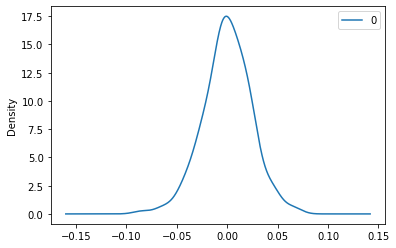

In [342]:
residuals=pd.DataFrame(fit.resid)
residuals.plot(kind='kde')
residuals.describe()


In [385]:
from scipy import stats
def normality(res):
    shapiro_test=stats.shapiro(res)
    if shapiro_test.pvalue >= 0.05:
        print('the residuals are normal with pvalue {}'.format(shapiro_test.pvalue))
    else:
        print(' the residuals are not normal with p value {}'.format(shapiro_test.pvalue))
normality(residuals)


the residuals are normal with pvalue 0.2548830211162567


In [366]:
import statsmodels.stats.api as sms
## since the length of the reisudals since to diff with our exogenous variables
## we restrict to match the length
print(len(residuals))
test = sms.het_breuschpagan(newresid,df2.iloc[0:193],robust=False)
if test[1] <= 0.05:
    print("heteroskedastic with pvalue{}".format(test[1]))
else:
    print("homoskedastic with pvalue {}".format(test[1]))

193
homoskedastic with pvalue 0.07079007430055931


In [381]:
import statsmodels.stats.api as sms
## since the length of the reisudals since to diff with our exogenous variables
## we restrict to match the length
print(len(newresid))
test = sms.het_white(newresid**2,df2.iloc[0:193])
if test[1] <= 0.05:
    print("heteroskedastic with pvalue{}".format(test[1]))
else:
    print("homoskedastic with pvalue {}".format(test[1]))

193


AssertionError: 

# Question 2.2
* The F-test for regression rejects the null that B_i=0  for all i 
* The pvalue for the alpha is low not supported by FF(Farma-French) theory
* AIC is suffice but the R^2 of ~  0.2 is low 
* The Pvalue for the factor value vs growth is significant
* The pvalue for the factor Low Risk and Momentum  are low contradicting FF
* The condition number is far too high, perhaps investigation with univarite regresion models can help detect multicolineaity amgonsts the factors but this is already seen above via Kendall's correlation
* The Omnibus hypothesis test indicate the betas are strongly non-zero
* The residuals clearly are  ~ N(/mu,/sigma) (as shown from the density plot and Shapiro-Wilk hypothesis test), homoskedastic(displayed the Breusch-Pagan hypothesis test) and do not exhibit autocorrelation( demonstrated by the Durbin-Watson test of value from the model summary) as required to obtain the BLUE(Best Linear Unbiased Estimate) under OLS
* Box-Cox plots reveal nonlinear dependencies, in particular the following factors have a negative power law dependency Factor - Trend, Factor - Foreign Currency , Factor - Interest Rates and Factor - Quality
* The factor quality has a large lambda of 21 
* thus this is an incomplete model for many of the reasons listed above

# Question 2.3
# Financial Economic Theory:
* The Capital Assest Pricing Model implies a MultiLinear Regression model for the returns of the fund
* The expected return of the fund is given by the sum of the betas weighted by the risk premium of the factor B_i
* Intuitively we will neglect factors with negative betas as it induces negative sharpe ratio
* Now it is a question of what will the weights for each of the factors to yeild optimal portfolio
* Notice that sum of all the POSITIVE betas is ~ 1, we can use the beta coefficents as a weighting for the optimal portfolio while again neglecting the factors with negative beta
* The sharpe ratio is given by the expected return/ variance of return this yields the trade off between returns and variance in Markowitz's efficent frontier

In [222]:
# Imposing that all betas will sum to 1
#some reason this yields an error after running it again if i comment it away code runs fin
betas=np.array([x for x in fit.params[1:] if x>0]) 
betas.sum()
betas=betas/betas.sum()
posfactor=['Factor - Value vs Growth','Factor - Fixed Income Carry','Factor - Foreign Exchange Carry','Factor - Small Cap','Factor - Foreign Currency','Factor - Equity Short Volatility', 'Factor - Credit','Factor - Crowding','Factor - Momentum','Factor - Quality']
posreturns=df2[posfactor]
#print(len(betas))
#print(len(posreturns.columns))
total_return=([])

for i in range(0,len(posreturns)):
    total_return.append(np.dot(betas,posreturns.iloc[i,:]))
    
# sum total return
#
total_return=np.array(total_return)
def sharperatio(totalreturn):
    return 
posbetasharpe=sharperatio(total_return)
hedgefundsharpe=sharperatio(y_train)
print("The sharpe ratio for positive beta factor portforlio is {}".format(posbetasharpe))
print("The sharpe ratio for the Hegde Fund is {}".format(hedgefundsharpe))
if posbetasharpe > hedgefundsharpe:
    print("Hedge fund is less profitable strategy")
else:
    print("Hegde fund is more profitable strategy")

The sharpe ratio for positive beta factor portforlio is 18.95659639505913
The sharpe ratio for the Hegde Fund is 9.677246956004389
Hedge fund is less profitable strategy


In [370]:

#betass=fit.params[1:]
newbeta=newbeta/newbeta.sum()
#print(betass)
total_return2=([])

for i in range(0,len(df2)):
    total_return2.append(np.dot(newbeta,df2.iloc[i,:]))
total_return2=np.array(total_return2)
#print(total_return2.sum())
#print(total_return2.std())
betasharperatio=(np.array(total_return2).sum())/(np.std(total_return2))
hedgefundsharperatio=np.array(df["Hedge Fund"]).sum()/(np.std(df["Hedge Fund"]))
print(betasharperatio)
print(hedgefundsharperatio)

-26.582863629852383
55.6079185039718


# Question 2.4 
* In Markowitz's efficent frontier variance acts as the risk of returns although this is quite naive; a more sophisticated apporach is to consider the higher order moments such as skewness and kurtosis which entails a sense of the distribution

In [352]:
from scipy.stats import skew, kurtosis
def riskiness(ar,name):
    print("The variance, skewness and kurtosis for the "+name+ " returns is given by {}, {}, and {}".format(np.power(np.std(ar),2),skew(ar,axis=0,bias=True),kurtosis(ar,axis=0,bias=True)))
riskiness(total_return2,"factor")
riskiness(y_train,"Hedge")
##


The variance, skewness and kurtosis for the factor returns is given by 0.0003403539719462916, 0.8759445135373115, and 3.2269146329689242
The variance, skewness and kurtosis for the Hedge returns is given by 0.0008741878226376033, -0.24845639231901856, and 0.613297317146603


* Both portforlios are leptokurtic however the positive beta factor portforlio is more leptokurtic indicating a taller peak but also the positive beta factor portforlio is skewed towards the left significantly more indicating that the distribution of returns  has alot of potential loss exposure.
* Therefore the positive beta factor portfolio is more risky.

# Question 2.5
* Many financial economic papers from in 1970's by Blume and Levy and Fisher and Lamin conclude betas are nonstationary
* clearly the multilinear regression procedure performed assumes that the Beta coeffeients do not change with time although mathematically one can propose a model which does
* From a risk perspective since the stock price of many firms change with there estimation for beta it seems crucial the betas be dynamically calibrated under some secure statstical framework